<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Python%20SKLearn/Training%20Models/Iris%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Iris Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
#iris['data'] is a 150x4 array. 
X = iris['data'][:,3:] # get the last column: petal width
y = (iris['target'] == 2).astype(np.int) #label is iris-virginica or not

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


Fit a Logisitc Regression solver to the petal-iris_virginica data

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

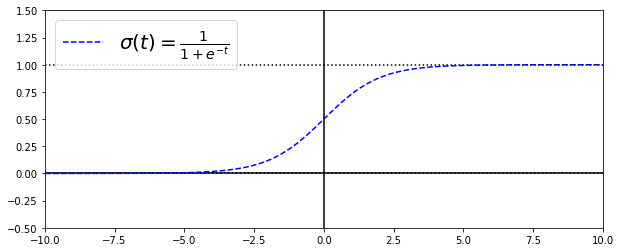

In [7]:
plt.figure(figsize=(10,4))
#plot axis
plt.plot([-10,10],[0,0], 'k-') #x-axis
plt.plot([0,0],[-10,10],'k-') #y-axis
#plot asymptotes
plt.plot([-10,10], [1,1], 'k:')
plt.plot([-10,10], [0,0], 'k:')
#restrict viewing window
plt.axis([-10, 10, -0.5, 1.5])
#draw logisitic function
t = np.linspace(-10,10,100)
sig = 1 / (1 + np.exp(-t))
plt.plot(t, sig, 'b--', label=r'$\sigma(t) = \frac{1}{1 + e^{-t}}$')
plt.legend(loc='upper left', fontsize=20)
plt.show()


Plot the probability of the flower being Iris Virginica based on it's petal length

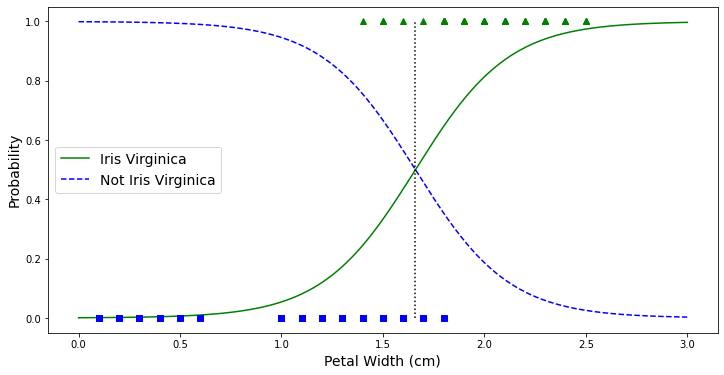

In [8]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)



plt.figure(figsize=(12,6))

#prediction curves of trained model
plt.plot(X_new, y_proba[:,1], 'g-', label="Iris Virginica")
plt.plot(X_new, y_proba[:,0], 'b--', label="Not Iris Virginica")

#calculate and plot decision boundary
decision_boundary = X_new[y_proba[:,1] >= 0.5][0]
plt.plot([decision_boundary, decision_boundary], [0,1], 'k:')

#plot the actual classes
plt.plot(X[y==0], y[y==0], 'bs')
plt.plot(X[y==1], y[y==1], 'g^')

#labels, legends, etc
plt.xlabel("Petal Width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.show()

# Logistic Regression: 
Binary classification. Iris Virginica or Not


In [47]:
from sklearn.linear_model import LogisticRegression

#select the petal lengths and width
X = iris.data[:, (2,3)]
y = (iris.target == 2).astype(int)

In [48]:
log_reg = LogisticRegression(C=10**10) #currently unregularized
log_reg.fit(X,y)

LogisticRegression(C=10000000000)

In [49]:
#create meshgrid of x-y values

x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1,1),
    np.linspace(0.8, 2.7, 200).reshape(-1,1)
)

In [50]:
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

In [51]:
zz = y_proba[:,1].reshape(x0.shape)


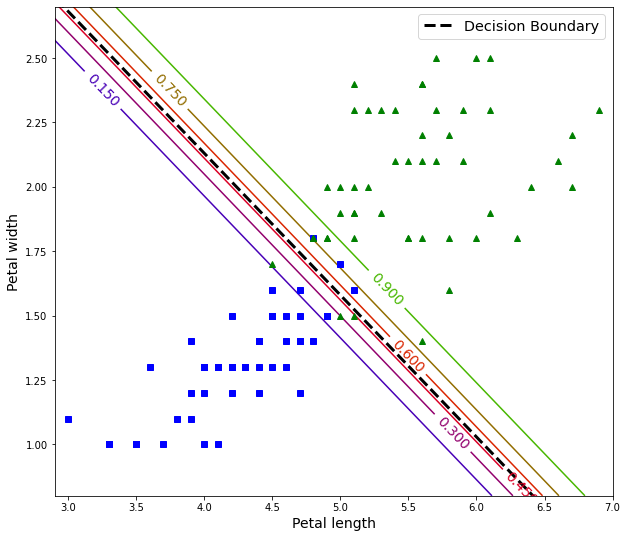

In [60]:
plt.figure(figsize=(10,9))

left_right = np.array([2.9, 7])
decision_boundary = -(log_reg.coef_[0][0] + log_reg.intercept_)/log_reg.coef_[0][1]

contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.plot(left_right, boundary, 'k--', linewidth=3, label="Decision Boundary")
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.clabel(contour, fontsize=14)

plt.axis([2.9, 7, 0.8, 2.7])
plt.legend(fontsize='x-large')

# Softmax Regression
Multiclass output.

In [62]:
#X = X; X already stores petal length/width
y = iris.target

True

In [64]:
softmax_reg = LogisticRegression(multi_class='multinomial', C=10)
softmax_reg.fit(X,y)

LogisticRegression(C=10, multi_class='multinomial')

In [99]:
#create plot for this 

x0, x1 = np.meshgrid(
    np.linspace(0, 7, 500),
    np.linspace(0, 3.5, 200)
)

In [100]:
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = softmax_reg.predict(X_new)
y_proba = softmax_reg.predict_proba(X_new)

In [101]:
z1 = y_proba[:,1].reshape(x0.shape)
z2 = y_predict.reshape(x0.shape)

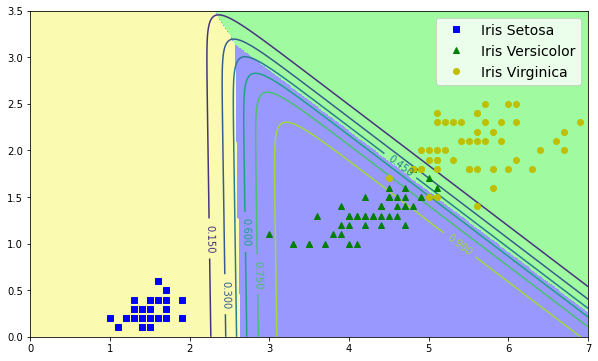

In [104]:
plt.figure(figsize=(10, 6))

plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Iris Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "g^", label="Iris Versicolor")
plt.plot(X[y==2, 0], X[y==2, 1], "yo", label="Iris Virginica" )

contour = plt.contour(x0, x1, z1)
plt.clabel(contour)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
contourf = plt.contourf(x0, x1, z2, cmap=custom_cmap)

plt.legend(fontsize=14)